<a href="https://colab.research.google.com/github/mmcuri/ds_handson/blob/master/Airbnb_Buenos_Aires_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - *Buenos Aires*

[Airbnb](https://www.airbnb.com.br/) can be considered nowadays the largest 

hotel chain and is disrupting the tourism industry on the entire world.

In 2007, during a weekend when hotels in San Francisco were sold out for conference, Brian Chesky and Joes Gebbia host on their own apartment the first guests of Airbedandbreakfast.com to make rent money. They could somehow validate their value proposition and started to put more energy on the idea. In 2008 Airbnb was founded and nowadays have 7M+ listings and is present in 100K+ cities worldwide.

Airbnb became a popular online rental marketplace and mobile app that connect hosts and guests looking for a alternative accommodation with short-term lodging and tourism-related activities.

The company is shaking up the tourism industry and put competitors out of their confort zone, by offering a excellent alternative to expesive and low-quality hotels service.

In Buenos Aires, the city could observe a boom since 2011, year that Airbnb landed in Argentina. Over 900,000 travellers stayed in AirBnb locations within Argentina in 2018 and the numbers keep increasing over the years.

<br>
<center>
<img alt="Buenos Aires" src="https://raw.githubusercontent.com/mmcuri/ds_handson/master/img/bsas_airbnb.jpg" width="80%" />
</center>
<br>

**On this notebook we are going to analyze data of Airbnb Buenos Aires hosts, and check which insights we can get from this data.**

## About the Data
The data used for this analyzes was provided by Inside Airbnb.

Inside Airbnb is an independent, non-commercial set of tools and data that provides to the community a way to explore how Airbnb is really being used in cities around the world.

Refer to [Inside Airbnb](http://insideairbnb.com/) website for more details.

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import listings.csv file as a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-05-25/visualisations/listings.csv");

## Data Analysis

Before starting the data analysis, let's get a bit of information and context of the *dataframe* we will analizing.


**Data Dictionary**

* `id` - unique identifier assigned to the property
* `name` - name of the property
* `host_id` - unique id assigned to the host
* `host_name` - host name
* `neighbourhood_group` - neighbourhood group
* `neighbourhood` - neighbourhood name
* `latitude` - property latitude
* `longitude` - property longitude
* `room_type` - room type
* `price` - price per night
* `minimum_nights` - minimum nights
* `number_of_reviews` - number of reviews
* `last_review` - last review date
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of host properties
* `availability_365` - number of available days within the year


In [4]:
# show first 5 entries of our dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4090,2,26,2019-11-28,0.27,1,271
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1637,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,3072,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,3072,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,3072,1,66,2019-11-27,1.84,7,365


### **How many attributes and entries this dataset have? What are the attributes data types?**

In [5]:
# identify the dataframe size
print("Number of entries:\t {}\n".format(df.shape[0]))
print("Number of attributes:\t {}\n".format(df.shape[1]))

# identify the dataframe attributes data types
print("Attribute data types:")
display(df.dtypes)


Number of entries:	 23828

Number of attributes:	 16

Attribute data types:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **What is the percentage of missing values on *dataset*?**

In [6]:
# get the percentage of missing values per attribute
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.277657
last_review                       0.277657
name                              0.000420
host_name                         0.000168
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* We can notice that column `neighbourhood_group` is not populated
* The attributes `reviews_per_month` and `last_review` have null values in 28% of the dataset
* The attributes `name` and `host_name` have approximately 0,4% and 0,1% respectively of their values as null

#### Cleaning Missing Data

As the variable `neighbourhood_group` has no data we are going to drop the column. After that the dataset is going to have 15 attributes.

In [7]:
# drop neighbourhood_group column/attribute

df.drop(['neighbourhood_group'], axis=1, inplace=True)

In [8]:
# check new dataset shape
df.shape

(23828, 15)

### **What are the attributes distribution?** 

To identify the distribution of numeric attributes, let's plot the numeric attributes histograms.

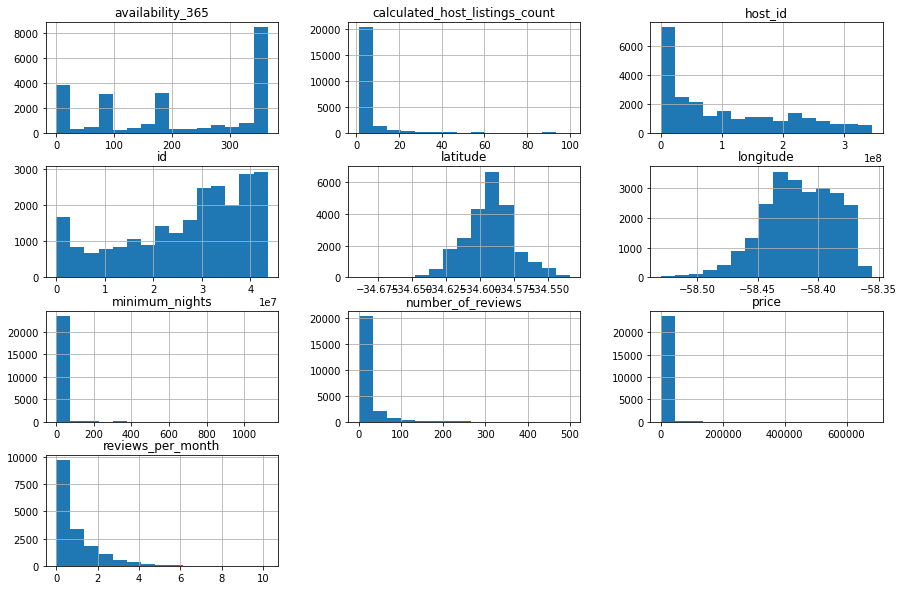

In [9]:
# plot histogram of numeric variables
df.hist(bins=15, figsize=(15,10));


By quickly analyzing the histograms, some distributions catch our attention. The distribution of attributes `price`, `minimum_nights` and `calculated_host_listings_count` shows explicit evidences of outliers presence, distorting the histogram representation.

### **Checking and removing outliers**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. 

In order to confirm the *outliers* presence that were verified, two main tools can help us. Those are:

* Generate descriptive statistics through out `describe()` function
* To plot variable `boxplots`

In [10]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23828.000000,23828.000000,23828.000000,17212.000000,23828.000000,23828.000000
mean,4154.259065,6.303676,16.156455,0.952863,6.323737,209.460173
std,17037.797459,25.923081,32.136814,1.067921,14.751120,139.348356
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1367.000000,1.000000,0.000000,0.210000,1.000000,89.000000
50%,2182.000000,3.000000,4.000000,0.560000,1.000000,180.000000
75%,3413.000000,5.000000,17.000000,1.320000,4.000000,364.000000
max,682597.000000,1125.000000,500.000000,10.210000,100.000000,365.000000


By taking a look at the `describe()` function output above, we can confirm from the descriptive statistics some hypotesis like:

* The `price` attribute has 75% of their values below ARS\$ 3413.00, however its maximum `price` value is ARS\$ 682,597.00. 
* The `minimum_nights` attribute has entries with more then 365 days a year.

Let's now generate boxplots for the `price` and `minimum_nights` columns, so we can better identify the outliers.


#### minimum_nights boxblot

Let's identify the outliers of `minimum_nights` column.

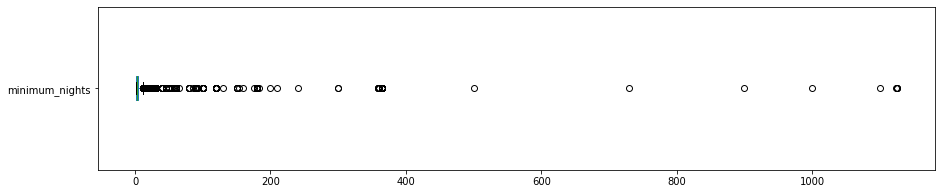

[minimum_nights] values higher than 30 days: 362 entries
[minimum_nights] % of values higher then 30 days: 1.5192%


In [11]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# quantity of values higher than 30 days for minimum_nights
print('[minimum_nights] values higher than 30 days: {} entries'.format(len(df[df.minimum_nights > 30])))
print('[minimum_nights] % of values higher then 30 days: {:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))


By choosing 30 days of minimum stay as a reasonable delimiter parameter for our assessment, we can see that there are 362 properties that accepts only more than 30 days as a minimal stay, which represents 1,5192% of the whole *dataset*.

#### price boxplot

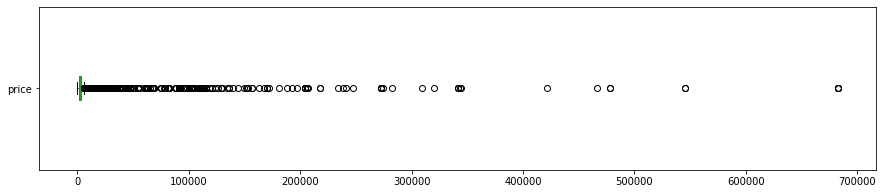

[price] number of properties with price higher than ARS$ 9,000: 1037
[price] % of properties with price higher than ARS$ 9,000: 4.3520%


In [12]:
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# check number of price values above 4000
print('[price] number of properties with price higher than ARS$ 9,000: {}'.format(len(df[df.price > 9000])))
print('[price] % of properties with price higher than ARS$ 9,000: {:.4f}%'.format((len(df[df.price > 9000]) / df.shape[0]) * 100))

By choosing ARS$ 9,000 as a reasonable delimiter parameter for our assessment, we can see that there are 1037 properties on the dataset with price above this value, which represents 4.3520% of the *dataset*.

#### Cleaning outliers and ploting new results

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bc0fdbef0>,
      dtype=object)

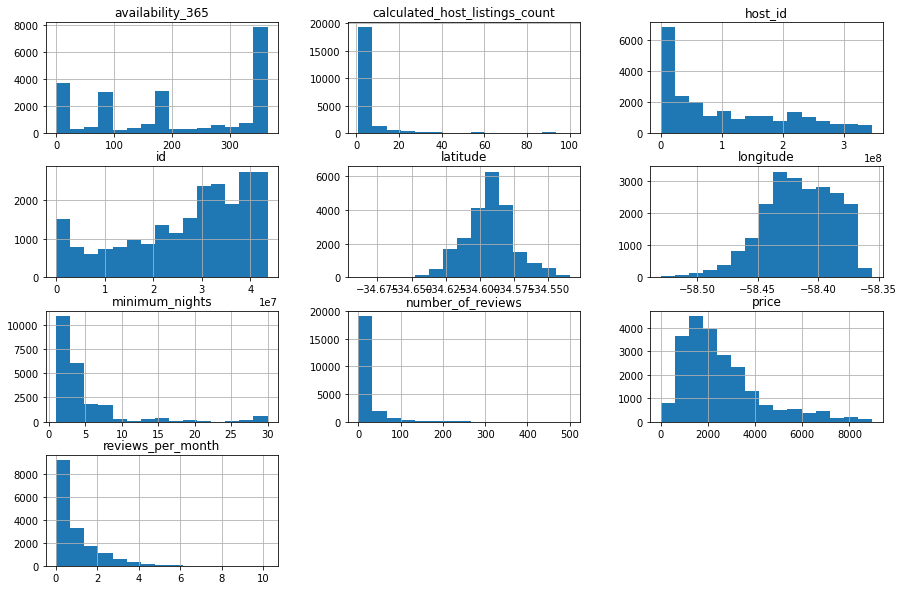

In [13]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 9000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.hist(bins=15, figsize=(15,10))

By removing the outliers, the boxplot now reflects the `price`and `minimum_nights` attributes reality in a much more clear way. 

### **What is the average of rental price/night?**

In [14]:
# check the rental price/night mean
print('Rental price average is ARS$ {:.2f}'.format(df_clean.price.mean()))

Rental price average is ARS$ 2534.36


### **What is the average of minimum_nights?**

In [15]:
# check the average of minumum_nights
print('Average of minimum stay is: {:.2f}'.format(df_clean.minimum_nights.mean()))

Average of minimum stay is: 4.34


### **Which correlation exists between the variables?**

In [16]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.021908,0.028623,-0.010922,0.141589,0.128332
minimum_nights,-0.021908,1.000000,-0.083635,-0.126606,0.110808,0.030516
number_of_reviews,0.028623,-0.083635,1.000000,0.677508,-0.054384,0.073156
reviews_per_month,-0.010922,-0.126606,0.677508,1.000000,-0.079217,-0.017744
calculated_host_listings_count,0.141589,0.110808,-0.054384,-0.079217,1.000000,0.093345
availability_365,0.128332,0.030516,0.073156,-0.017744,0.093345,1.000000


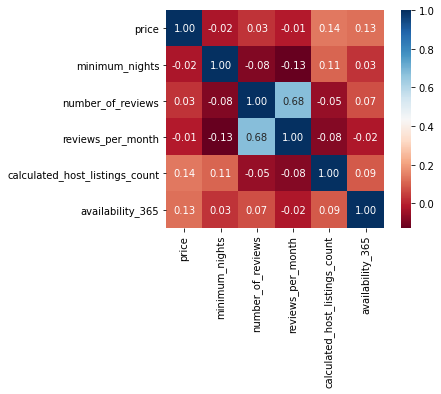

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


We can notice from the heatmap the there is a correlation between `number_of_reviews` and `reviews_per_month`. No other variables are significantly correlated.

### **What is the most rented room type in Buenos Aires through out Airbnb?**

In [18]:
# show the number of each room type available
df_clean.room_type.value_counts()

Entire home/apt    17291
Private room        4420
Shared room          524
Hotel room           214
Name: room_type, dtype: int64

In [42]:
# show the % of each room type available
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    77.023475
Private room       19.689073
Shared room         2.334180
Hotel room          0.953272
Name: room_type, dtype: float64

### **What is the most expesive location in Buenos Aires based on the *dataset*?**
We can compare and analyze the prices by calculating the average rental price of each neighbourhoods, as following:


In [31]:
# get rental prices avg per neighbourhood
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Puerto Madero    4746.427136
Villa Soldati    3859.666667
Palermo          2984.477006
Recoleta         2811.569843
Retiro           2809.729965
Villa Devoto     2678.347826
Versalles        2668.500000
San Nicolas      2411.651163
San Telmo        2404.767806
Belgrano         2401.214634
Name: price, dtype: float64

### **Which neighbourhood have more Aitbnb properties available for rental?**
We can compare and analyze the prices by calculating the average rental price of each neighbourhood, as following:


In [44]:
df_clean['neighbourhood'].value_counts() / df_clean.shape[0] * 100

Palermo              29.930064
Recoleta             16.455076
San Nicolas           5.937904
Retiro                5.113814
Balvanera             4.997995
Belgrano              4.565905
Monserrat             4.267451
Almagro               4.205087
Villa Crespo          3.412179
San Telmo             3.127088
Nuñez                 1.991180
Caballito             1.964453
Colegiales            1.933271
Chacarita             1.679362
Constitucion          1.371999
Villa Urquiza         1.064635
Puerto Madero         0.886454
Barracas              0.721636
San Cristobal         0.628090
Saavedra              0.587999
Boca                  0.570181
Boedo                 0.512272
Flores                0.481090
Villa Ortuzar         0.396454
Coghlan               0.387545
Parque Patricios      0.320727
Villa Devoto          0.307363
Villa Del Parque      0.240545
Parque Chacabuco      0.231636
Parque Chas           0.218273
Villa Pueyrredon      0.169273
Floresta              0.164818
Villa Gr

As Latitudes and Longitudes are provided for each properties, it is possible to plot each point.

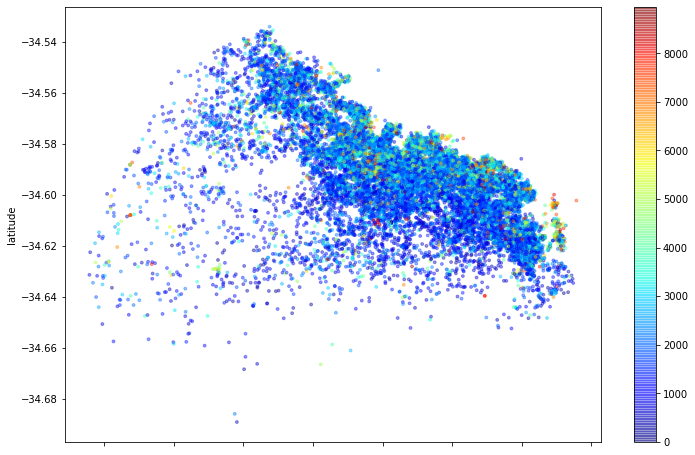

In [33]:
# plot propeties by their latitutes and longitudes
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


## Conclusions


This was a introductory analysis of the Airbnb presence and adoption in Buenos Aires. 

We could notice during the analysis that there were some outliers in the dataset, which could easily induce to wrong conclusions. In order to normalize the dataset, we did a clean up of missing values and outliers that were affecting the exploratory assessment.

As a result of that, we could then get some interesting and more accurate insights:

*   Entire home/apartament is the most popular room type available in Buenos Aires, with 77% out of total, followed by Private Room, with 19%.
*   The neighbourhoods with more properties available through out Airbnb platform are Palermo, with 29.93%, followed by Recoleta with 16.45%.
*   The most expensive location to stay in Buenos Aires is Puerto Madero, with average price of ARS$ 4746.43 per night.

The dataset used for this analysis is a reduced version of a complete dataset with 106 attributes made available by Inside Airbnb for the community.

**Data Science na Prática 2.0**

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

*by [Mariana Curi](https://www.linkedin.com/in/mmcuri/)*